## Tensorflow Tests for Kaulos

In [1]:
from kaulos import *
    
M = 2
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

component = LeakyIAF()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True, unroll = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''


Using TensorFlow backend.


Units: 2
State Size: 2
Unit Size per Layer: [2]
State Size per Layer: [[2]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 2)            0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 100, 2)            4         
Total params: 4
Trainable params: 0
Non-trainable params: 4
_________________________________________________________________
1.0283517837524414


'\nimport time\nstart = time.time()\nmodel_output = model.train_on_batch(x_train, x_train)\nend = time.time()\nprint(end - start)\n'

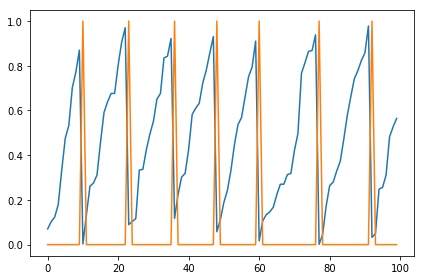

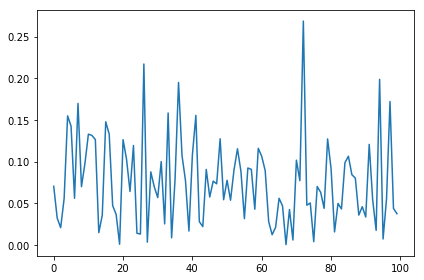

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [3]:
model_output[0][:,0] - x_train[0,:,0]

array([ -2.30086203e-09,   7.03187301e-02,   1.02500159e-01,
         1.23166603e-01,   1.78891685e-01,   3.33775272e-01,
         4.76304422e-01,   5.32267222e-01,   7.02119137e-01,
         7.72071407e-01,  -1.30106298e-01,   2.83324992e-03,
         1.34298519e-01,   2.60819577e-01,   2.75613745e-01,
         3.11303376e-01,   4.59131085e-01,   5.92031914e-01,
         6.39187623e-01,   6.75889494e-01,   6.76728476e-01,
         8.03055369e-01,   9.05939647e-01,  -2.98939188e-02,
         8.94238926e-02,   1.03412786e-01,   1.16475091e-01,
         3.33606342e-01,   3.36922523e-01,   4.24586826e-01,
         4.94331763e-01,   5.51130458e-01,   6.51133422e-01,
         6.76364119e-01,   8.34709554e-01,   8.43234762e-01,
        -7.76994362e-02,   1.17368340e-01,   2.24720718e-01,
         3.02131656e-01,   3.18766061e-01,   4.26933270e-01,
         5.82412090e-01,   6.10377150e-01,   6.32336885e-01,
         7.22970147e-01,   7.80496098e-01,   8.57070930e-01,
        -6.95460902e-02,

In [1]:
from kaulos import *
    
M = 2
T = 100000
max_len = 1000
B = int(T / max_len)
x_train = np.abs(np.random.randn(B,max_len,M)) * 0. + 10.0

component = HodgkinHuxley()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:], batch_shape = (1, max_len, M))
layer = RNN(cell, return_sequences = True, unroll = True, stateful = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train, batch_size = 1)
end = time.time()
print(end - start)

import time
start = time.time()
model_output = model.predict(x_train, batch_size = 1)
end = time.time()
print(end - start)


'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''

x_train = np.reshape(x_train,(B * max_len, -1))
model_output = np.reshape(model_output, (B * max_len, -1))

Using TensorFlow backend.


Units: 2
State Size: [2, 3]
Unit Size per Layer: [2]
State Size per Layer: [[2, 3]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (1, 1000, 2)              0         
_________________________________________________________________
rnn_1 (RNN)                  (1, 1000, 2)              4         
Total params: 4
Trainable params: 0
Non-trainable params: 4
_________________________________________________________________
80.9330677986145
65.02656412124634


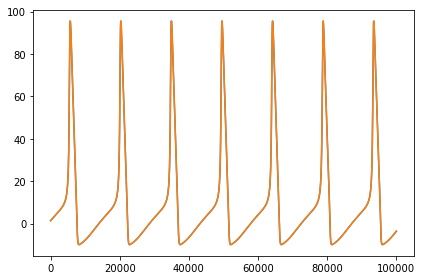

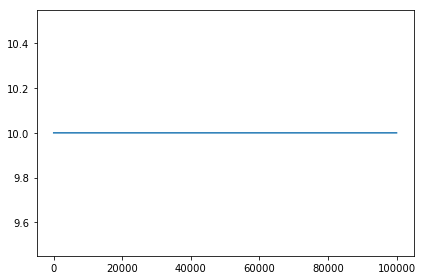

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output)
plt.tight_layout()

plt.figure()
plt.plot(x_train[:,0])
plt.tight_layout()